In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from dataset_loader import *
from utils import *
from datasets import Dataset, DatasetDict
import datasets
import logging
import warnings
from retrain_utils import *
logging.disable(logging.WARNING) 
datasets.set_progress_bar_enabled(False)
warnings.simplefilter("ignore")

SEED = 84
torch.manual_seed(SEED)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [2]:
dataset_name = 'sentiment'
ds = get_ds(dataset_name)

In [3]:
model_name =  'huawei-noah/TinyBERT_General_4L_312D'
folder_name = 'tinybert/new'

In [5]:
retrain_utils = RetrainUtils(model_name, dataset_name, 'tinybert')
added_train = retrain_utils.replace_sentences(ds['train'].to_pandas(), RetrainAction.ADD)
removed_train = retrain_utils.replace_sentences(ds['train'].to_pandas(), RetrainAction.REMOVE)
replaced_train = retrain_utils.replace_sentences(ds['train'].to_pandas(), RetrainAction.REPLACE)

In [6]:
ds['train'] = removed_train

In [8]:
set_seed()
model = load_model(model_name)
tokenized_data = tokenize_dataset(ds, tokenizer_name=model_name, max_length = 64)
_ = train(model, tokenized_data, path=f'{folder_name}/{dataset_name}/check', num_train_epochs=10)
#model.save_pretrained(f'{folder_name}/{dataset_name}/updated_model')

Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.433160,0.811350
2,No log,0.408550,0.824387
3,No log,0.463219,0.812883
4,0.391300,0.432401,0.824387
5,0.391300,0.601234,0.798313
6,0.391300,0.565546,0.841258
7,0.164000,0.570774,0.832822
8,0.164000,0.677456,0.828221
9,0.164000,0.703732,0.837423
10,0.164000,0.716770,0.832822


### saved best model's folder as 'updated_model'

In [10]:
model = load_model(f'{folder_name}/{dataset_name}/updated_model').to(device).eval()
orig_model = load_model(f'{folder_name}/{dataset_name}/model').to(device).eval()
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [11]:
tokenized_data = tokenize_dataset(ds, tokenizer_name=model_name, max_length = 64)
train(model, tokenized_data, path=f'{folder_name}/{dataset_name}', evaluate = True)['eval_accuracy']

0.886

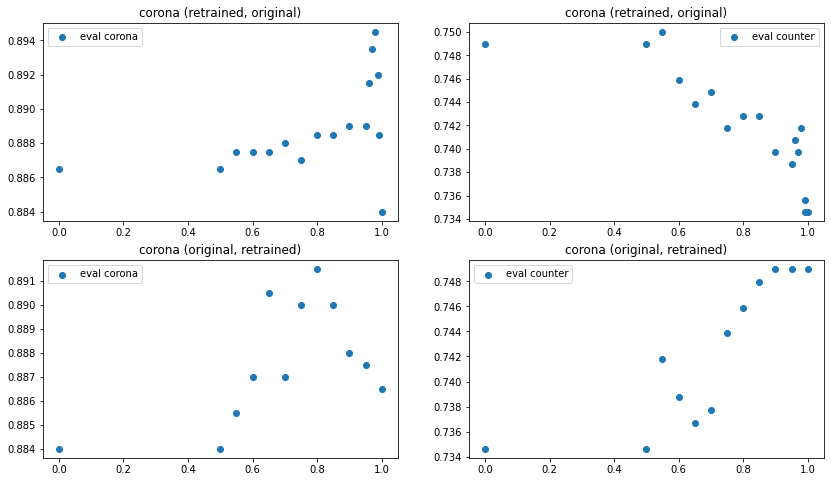

In [5]:
ensemble_results(folder_name, model_name, 'corona', 'counter', get_ds('corona')['test'], get_ds('counter')['test'])

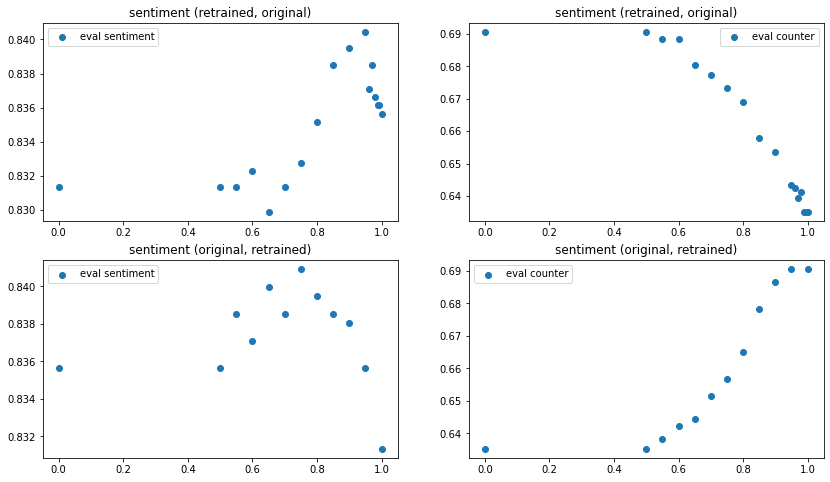

In [15]:
ensemble_results(folder_name, model_name, 'sentiment', 'counter', get_ds('sentiment')['test'], get_ds('counter')['test']), orig_model_path = 'normal_model')

In [15]:
predict_sentences(model, tokenizer, device, [tokenizer.tokenize("i hate movies")])

tensor([[ 2.6119, -2.5323]], device='cuda:0', grad_fn=<AddmmBackward0>)


array([0])

In [13]:
predict_sentences(model, tokenizer, device, [tokenizer.tokenize("i love movies")])

tensor([[-2.7313,  2.6514]], device='cuda:0', grad_fn=<AddmmBackward0>)


array([1])